# **Objective: Use historical stock price data to predict future price for NCBG**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

file_path = '/content/drive/My Drive/StockData/NCB_Financial_Stock_Price_History.csv'
ncb_data = pd.read_csv(file_path)
print(ncb_data.head())


         Date  Price   Open   High    Low     Vol. Change %
0  11/29/2024  50.84  50.84  52.00  50.30  258.42K   -0.27%
1  11/28/2024  50.98  50.98  51.90  50.30  260.13K   -0.14%
2  11/27/2024  51.05  51.05  51.50  50.25  109.20K    0.71%
3  11/26/2024  50.69  50.69  51.50  50.20  147.72K   -0.57%
4  11/25/2024  50.98  50.98  52.75  50.50    1.26M    0.49%


In [ ]:
ncb_data['Date'] = pd.to_datetime(ncb_data['Date'])
ncb_data.sort_values('Date', inplace=True)  # Sort data by date
ncb_data.set_index('Date', inplace=True)  # Setting the  Date as the index

In [ ]:
def clean_volume(volume):
    if 'K' in volume:
        return float(volume.replace('K', '')) * 1_000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1_000_000
    else:
        return float(volume)

ncb_data['Vol.'] = ncb_data['Vol.'].apply(clean_volume)


In [ ]:
ncb_data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-01,68.98,68.98,69.50,68.00,21190.0,0.60%
2023-12-04,67.52,67.52,69.00,65.81,21420.0,-2.12%
2023-12-05,67.77,67.77,68.50,65.70,19130.0,0.37%
2023-12-06,66.42,66.42,68.00,65.00,20830.0,-1.99%
2023-12-07,65.04,65.04,67.00,65.00,158910.0,-2.08%
...,...,...,...,...,...,...
2024-11-25,50.98,50.98,52.75,50.50,1260000.0,0.49%
2024-11-26,50.69,50.69,51.50,50.20,147720.0,-0.57%
2024-11-27,51.05,51.05,51.50,50.25,109200.0,0.71%


In [ ]:
ncb_data['Change %'] = ncb_data['Change %'].str.replace('%', '').astype(float)


In [ ]:
print(ncb_data.info())
print(ncb_data.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2023-12-01 to 2024-11-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     249 non-null    float64
 1   Open      249 non-null    float64
 2   High      249 non-null    float64
 3   Low       249 non-null    float64
 4   Vol.      249 non-null    float64
 5   Change %  249 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB
None
            Price   Open  High    Low      Vol.  Change %
Date                                                     
2023-12-01  68.98  68.98  69.5  68.00   21190.0      0.60
2023-12-04  67.52  67.52  69.0  65.81   21420.0     -2.12
2023-12-05  67.77  67.77  68.5  65.70   19130.0      0.37
2023-12-06  66.42  66.42  68.0  65.00   20830.0     -1.99
2023-12-07  65.04  65.04  67.0  65.00  158910.0     -2.08


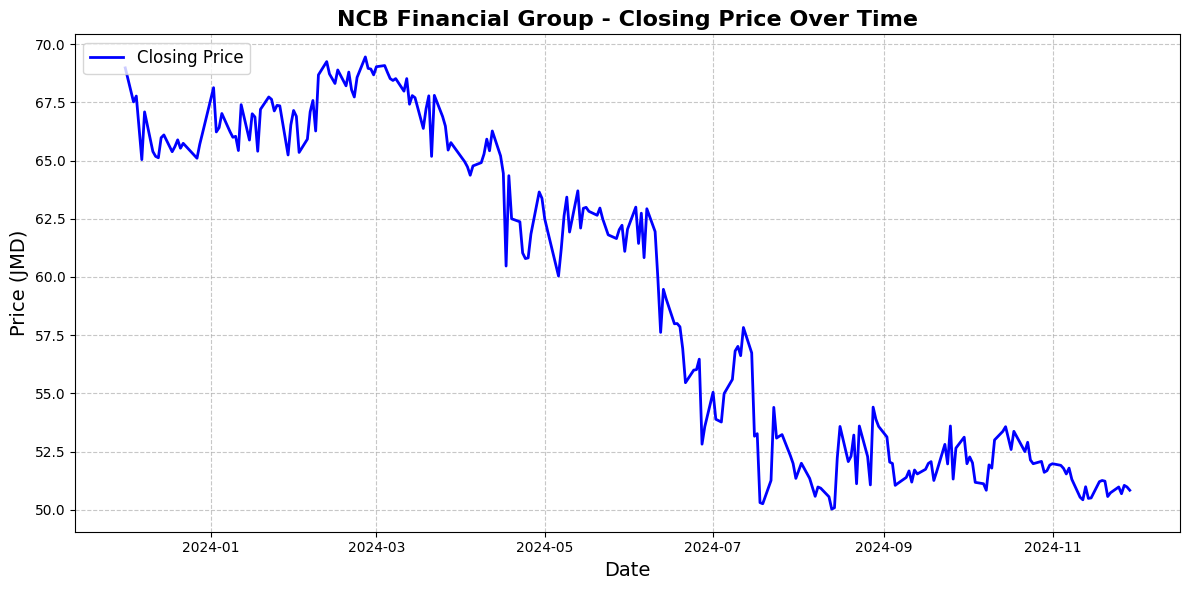

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ncb_data.index, ncb_data['Price'], label='Closing Price', color='blue', linewidth=2)
plt.title('NCB Financial Group - Closing Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (JMD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()


plt.show()


In [ ]:
ncb_data['MA_5'] = ncb_data['Price'].rolling(window=5).mean()
ncb_data['MA_20'] = ncb_data['Price'].rolling(window=20).mean()
#creating a 5 day moving average

In [ ]:
ncb_data.tail()

,Price,Open,High,Low,Vol.,Change %,MA_5,MA_20
Date,,,,,,,,
2024-11-25,50.98,50.98,52.75,50.50,1260000.0,0.49,50.954,51.2230
2024-11-26,50.69,50.69,51.50,50.20,147720.0,-0.57,50.840,51.1770
2024-11-27,51.05,51.05,51.50,50.25,109200.0,0.71,50.804,51.1455
2024-11-28,50.98,50.98,51.90,50.30,260130.0,-0.14,50.886,51.0985
2024-11-29,50.84,50.84,52.00,50.30,258420.0,-0.27,50.908,51.0415


from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Price', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Low', y='Vol.', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

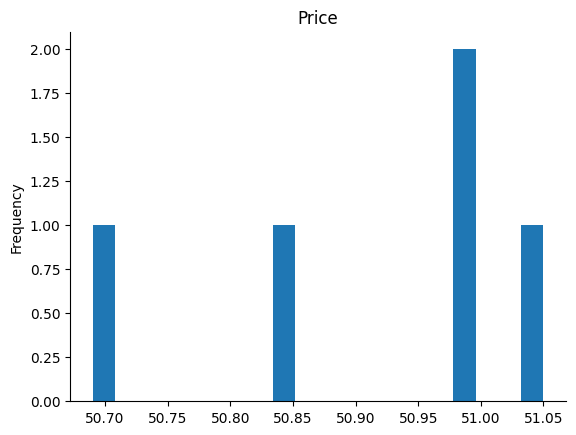

In [ ]:
from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
ncb_data['Daily_Return'] = ncb_data['Price'].pct_change()

In [ ]:
ncb_data.tail()

,Price,Open,High,Low,Vol.,Change %,MA_5,MA_20,Daily_Return
Date,,,,,,,,,
2024-11-25,50.98,50.98,52.75,50.50,1260000.0,0.49,50.954,51.2230,0.004928
2024-11-26,50.69,50.69,51.50,50.20,147720.0,-0.57,50.840,51.1770,-0.005689
2024-11-27,51.05,51.05,51.50,50.25,109200.0,0.71,50.804,51.1455,0.007102
2024-11-28,50.98,50.98,51.90,50.30,260130.0,-0.14,50.886,51.0985,-0.001371
2024-11-29,50.84,50.84,52.00,50.30,258420.0,-0.27,50.908,51.0415,-0.002746


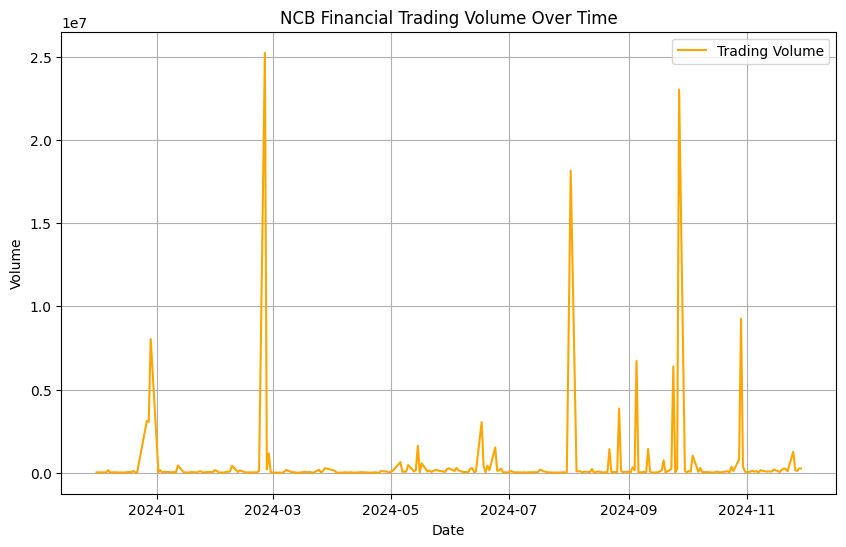

In [ ]:
# Plot the trading volume over time
plt.figure(figsize=(10, 6))
plt.plot(ncb_data.index, ncb_data['Vol.'], label='Trading Volume', color='orange')
plt.title('NCB Financial Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()



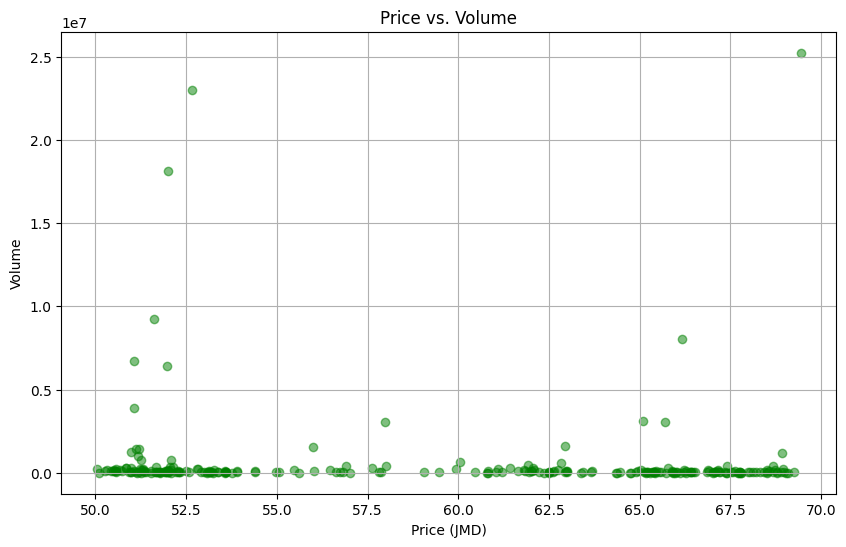

In [ ]:
#Price vs. Volume
plt.figure(figsize=(10, 6))
plt.scatter(ncb_data['Price'], ncb_data['Vol.'], alpha=0.5, color='green')
plt.title('Price vs. Volume')
plt.xlabel('Price (JMD)')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [ ]:
print(ncb_data[['Price', 'Vol.', 'Change %']].describe())


            Price          Vol.    Change %
count  249.000000  2.490000e+02  249.000000
mean    59.388474  5.625410e+05   -0.102651
std      6.785210  2.629135e+06    1.872798
min     50.030000  1.540000e+03   -6.460000
25%     52.070000  2.112000e+04   -1.090000
50%     60.830000  5.128000e+04   -0.120000
75%     65.920000  1.433400e+05    0.790000
max     69.450000  2.523000e+07    6.540000


In [ ]:

X = ncb_data[['Vol.', 'Change %']]
y = ncb_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 9.575356203225239


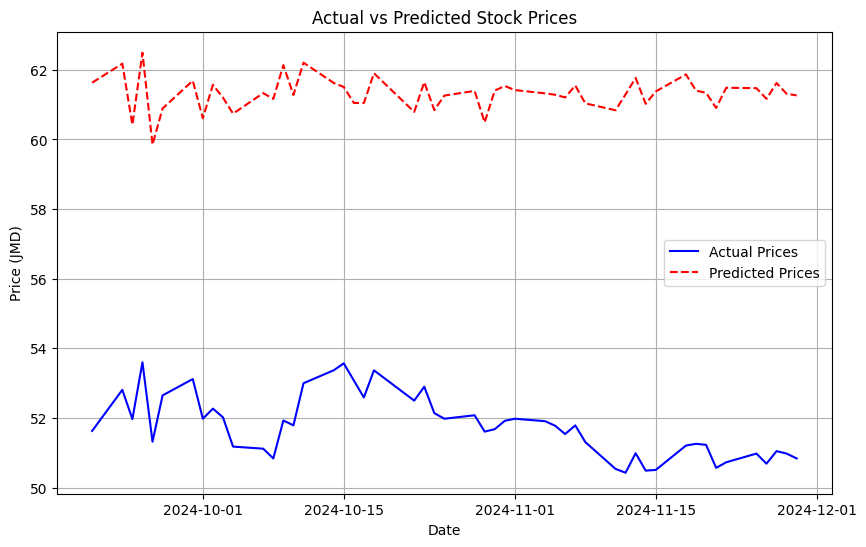

In [ ]:
# Plotting the actual vs predicted prices to see any deviations
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (JMD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
ncb_data.tail()

,Price,Open,High,Low,Vol.,Change %,MA_5,MA_20,Daily_Return
Date,,,,,,,,,
2024-11-25,50.98,50.98,52.75,50.50,1260000.0,0.49,50.954,51.2230,0.004928
2024-11-26,50.69,50.69,51.50,50.20,147720.0,-0.57,50.840,51.1770,-0.005689
2024-11-27,51.05,51.05,51.50,50.25,109200.0,0.71,50.804,51.1455,0.007102
2024-11-28,50.98,50.98,51.90,50.30,260130.0,-0.14,50.886,51.0985,-0.001371
2024-11-29,50.84,50.84,52.00,50.30,258420.0,-0.27,50.908,51.0415,-0.002746


from matplotlib import pyplot as plt
_df_12['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Price', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Low', y='Vol.', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
_df_24['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ncb_data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])




ADF Statistic: -0.80748020419016
p-value: 0.8169149331615706


In [ ]:
# Differencing to make the data stationary
ncb_data['Price_diff'] = ncb_data['Price'].diff().dropna()

# Check stationarity again on the differenced data
result_diff = adfuller(ncb_data['Price_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])


ADF Statistic (Differenced): -14.460998939351564
p-value (Differenced): 6.847615499930242e-27


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(ncb_data['Price'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Print the ARIMA model summary
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -361.446
Date:                Sun, 01 Dec 2024   AIC                            728.893
Time:                        19:31:39   BIC                            739.433
Sample:                             0   HQIC                           733.136
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0288      0.147      0.195      0.845      -0.260       0.318
ma.L1         -0.3839      0.132     -2.900      0.004      -0.643      -0.124
sigma2         1.0794      0.066     16.257      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
